In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
data_path = './data/0805/'
train_df = pd.read_csv(data_path + 'heart_disease.csv')
train_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
train_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
train_df.duplicated().value_counts()

False    229781
True      23899
dtype: int64

In [5]:
train_df = train_df.drop_duplicates(keep='first')
train_df.duplicated().value_counts()

False    229781
dtype: int64

In [6]:
pd.DataFrame({'count': train_df['HeartDiseaseorAttack'].value_counts(), 'ratio(%)': train_df['HeartDiseaseorAttack'].value_counts(normalize=True)*100})

,count,ratio(%)
0.0,206064,89.678433
1.0,23717,10.321567


In [7]:
# 개인 프로필
Demo = ['Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
train_df[Demo].head()

,Sex,Age,Education,Income,AnyHealthcare,NoDocbcCost
0,0.0,9.0,4.0,3.0,1.0,0.0
1,0.0,7.0,6.0,1.0,0.0,1.0
2,0.0,9.0,4.0,8.0,1.0,1.0
3,0.0,11.0,3.0,6.0,1.0,0.0
4,0.0,11.0,5.0,4.0,1.0,0.0


In [8]:
# 기저 질환 유무
medical_history = ['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']
train_df[medical_history].head()

,HighBP,Stroke,Diabetes,HighChol,CholCheck
0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0


In [9]:
# 일상 생활/식습과 패턴
life_style = ['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'GenHlth']
train_df[life_style].head()

,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,GenHlth
0,40.0,1.0,0.0,0.0,1.0,0.0,18.0,15.0,1.0,5.0
1,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,28.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,1.0,5.0
3,27.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,24.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,2.0


In [10]:
def show_ratio(df, val):
    df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count', 'sum'])
    df_gp['ratio'] = round(df_gp['sum']/ df_gp['count']*100, 1)
    df_gp['ratio2'] = round(df_gp['count']/len(df)*100, 1)
    print(df_gp)
    plt.figure(figsize=(2,2))
    sns.catplot(data=df, x=val, hue='HeartDiseaseorAttack', kind='count', palette='pastel', edgecolor='.6')

      count      sum  ratio  ratio2
Sex                                
0.0  128854  10187.0    7.9    56.1
1.0  100927  13530.0   13.4    43.9


<Figure size 200x200 with 0 Axes>

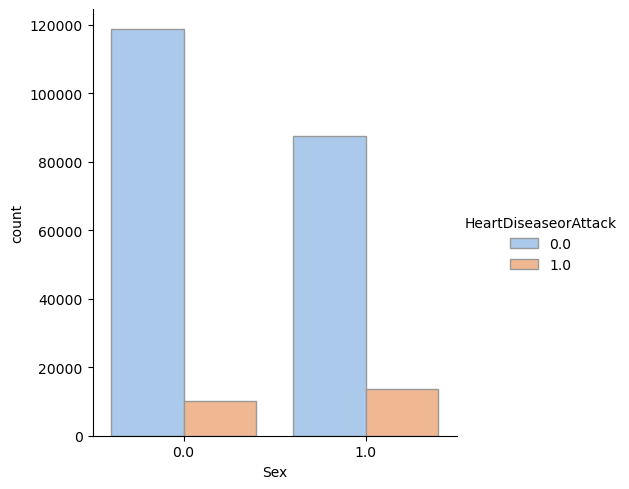

In [11]:
# 기저 질환 유무로 살펴보기
show_ratio(train_df, 'Sex')

      count     sum  ratio  ratio2
Age                               
1.0    5512    29.0    0.5     2.4
2.0    7068    54.0    0.8     3.1
3.0   10025   126.0    1.3     4.4
4.0   12234   193.0    1.6     5.3
5.0   14050   351.0    2.5     6.1
6.0   17299   711.0    4.1     7.5
7.0   23140  1424.0    6.2    10.1
8.0   27301  2248.0    8.2    11.9
9.0   29736  3346.0   11.3    12.9
10.0  29168  4135.0   14.2    12.7
11.0  22041  3896.0   17.7     9.6
12.0  15394  3076.0   20.0     6.7
13.0  16813  4128.0   24.6     7.3


<Figure size 200x200 with 0 Axes>

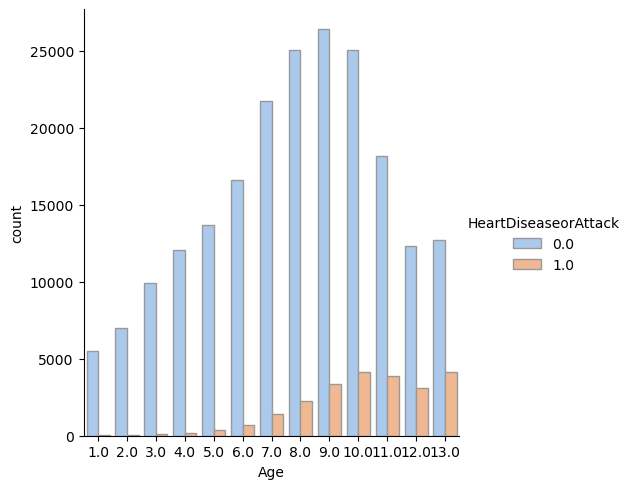

In [12]:
show_ratio(train_df, 'Age')

           count     sum  ratio  ratio2
Education                              
1.0          174    29.0   16.7     0.1
2.0         4040   778.0   19.3     1.8
3.0         9467  1617.0   17.1     4.1
4.0        61158  7452.0   12.2    26.6
5.0        66499  6890.0   10.4    28.9
6.0        88443  6951.0    7.9    38.5


<Figure size 200x200 with 0 Axes>

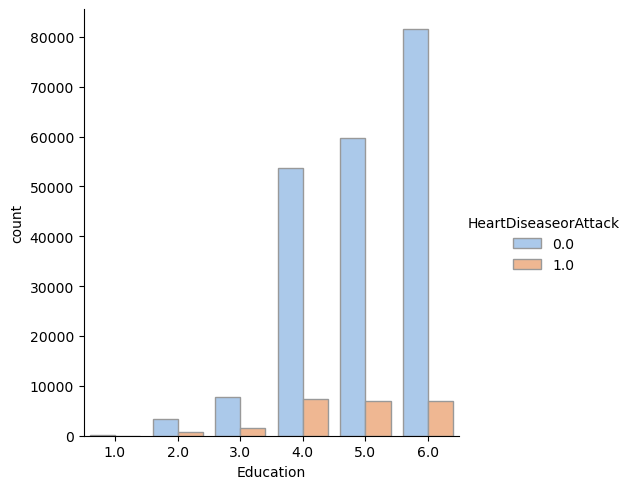

In [13]:
show_ratio(train_df, 'Education')

        count     sum  ratio  ratio2
Income                              
1.0      9792  1553.0   15.9     4.3
2.0     11757  2195.0   18.7     5.1
3.0     15922  2518.0   15.8     6.9
4.0     19957  2827.0   14.2     8.7
5.0     25345  3153.0   12.4    11.0
6.0     35001  3618.0   10.3    15.2
7.0     40189  3379.0    8.4    17.5
8.0     71818  4474.0    6.2    31.3


<Figure size 200x200 with 0 Axes>

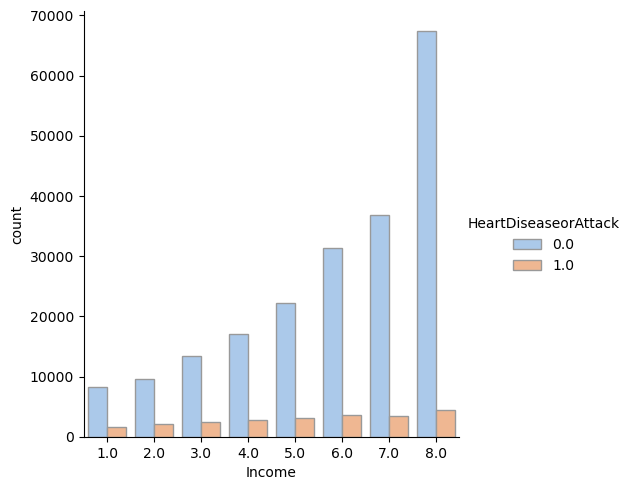

In [14]:
show_ratio(train_df, 'Income')

                count      sum  ratio  ratio2
AnyHealthcare                                
0.0             12391    870.0    7.0     5.4
1.0            217390  22847.0   10.5    94.6


<Figure size 200x200 with 0 Axes>

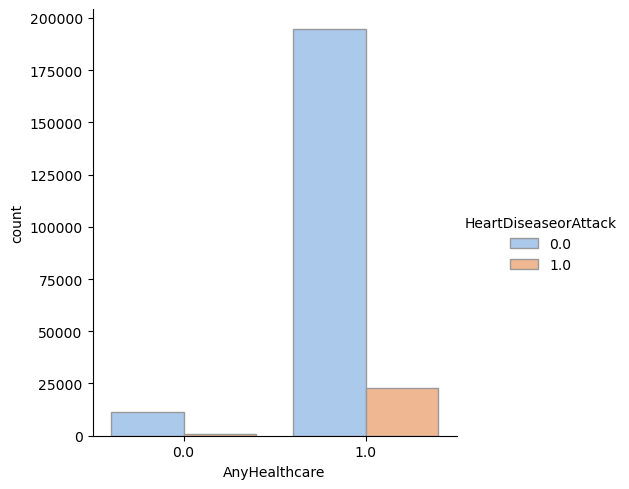

In [15]:
show_ratio(train_df, 'AnyHealthcare')

              count      sum  ratio  ratio2
NoDocbcCost                                
0.0          208455  21068.0   10.1    90.7
1.0           21326   2649.0   12.4     9.3


<Figure size 200x200 with 0 Axes>

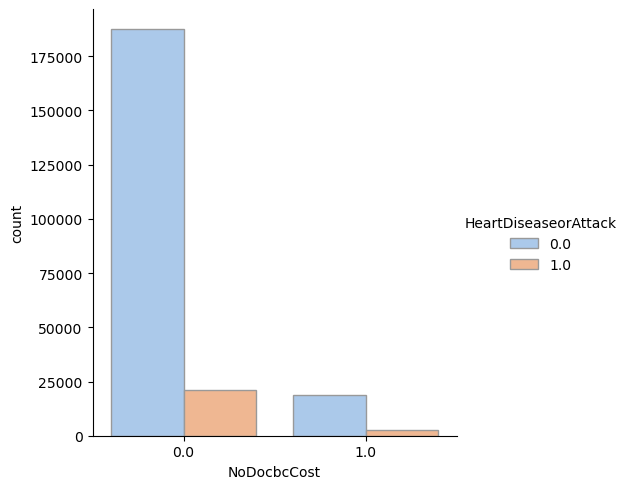

In [16]:
show_ratio(train_df, 'NoDocbcCost')

In [17]:
# 밀접 질환 병력 유무
medical_history

['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']

         count      sum  ratio  ratio2
HighBP                                
0.0     125359   5933.0    4.7    54.6
1.0     104422  17784.0   17.0    45.4


<Figure size 200x200 with 0 Axes>

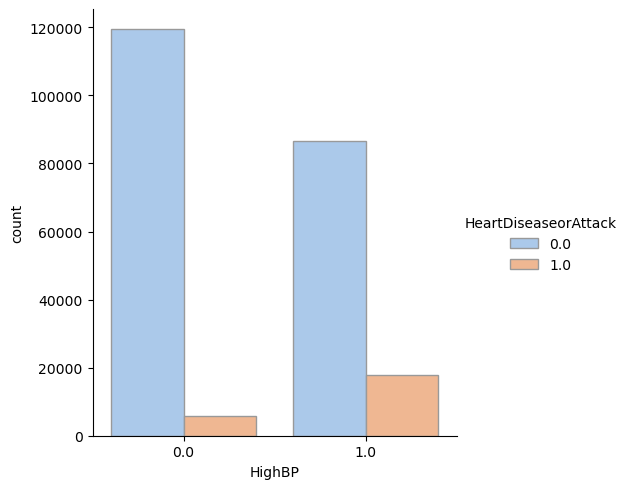

In [18]:
show_ratio(train_df, 'HighBP')

         count      sum  ratio  ratio2
Stroke                                
0.0     219497  19781.0    9.0    95.5
1.0      10284   3936.0   38.3     4.5


<Figure size 200x200 with 0 Axes>

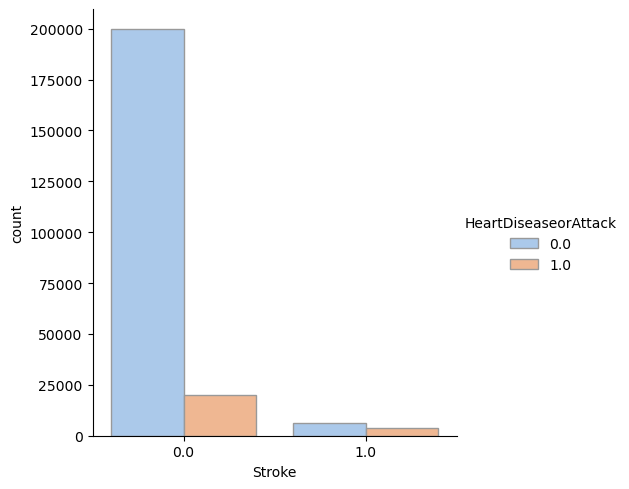

In [19]:
show_ratio(train_df, 'Stroke')

           count      sum  ratio  ratio2
Diabetes                                
0.0       190055  15197.0    8.0    82.7
1.0         4629    664.0   14.3     2.0
2.0        35097   7856.0   22.4    15.3


<Figure size 200x200 with 0 Axes>

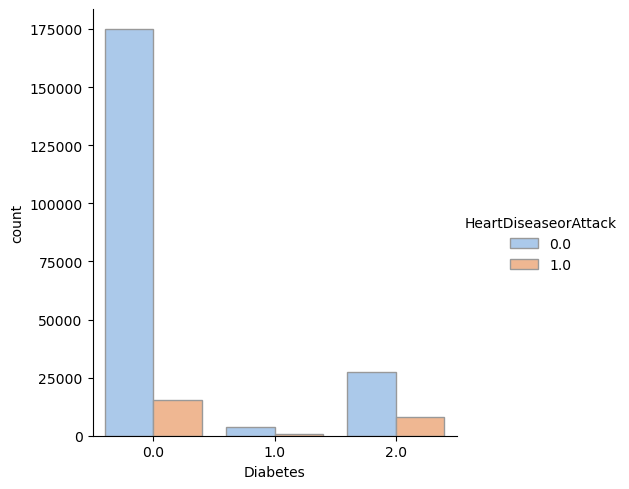

In [20]:
show_ratio(train_df, 'Diabetes')

           count      sum  ratio  ratio2
HighChol                                
0.0       128273   7120.0    5.6    55.8
1.0       101508  16597.0   16.4    44.2


<Figure size 200x200 with 0 Axes>

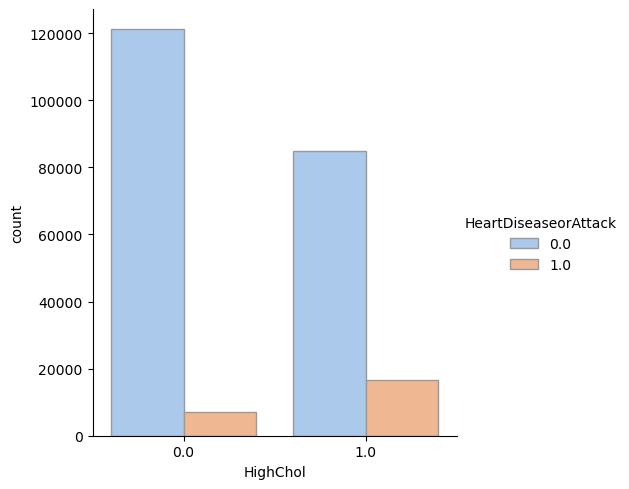

In [21]:
show_ratio(train_df, 'HighChol')

            count      sum  ratio  ratio2
CholCheck                                
0.0          9298    271.0    2.9     4.0
1.0        220483  23446.0   10.6    96.0


<Figure size 200x200 with 0 Axes>

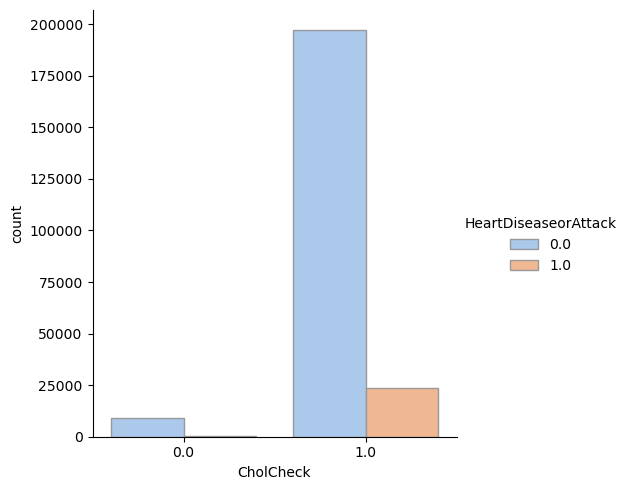

In [22]:
show_ratio(train_df, 'CholCheck')

In [23]:
# 일상생활/식습관 패턴
life_style

['BMI',
 'Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'GenHlth']

      count   sum  ratio  ratio2
BMI                             
12.0      6   1.0   16.7     0.0
13.0     21   1.0    4.8     0.0
14.0     41   8.0   19.5     0.0
15.0    132  17.0   12.9     0.1
16.0    348  52.0   14.9     0.2
...     ...   ...    ...     ...
91.0      1   0.0    0.0     0.0
92.0     32   3.0    9.4     0.0
95.0     12   1.0    8.3     0.0
96.0      1   0.0    0.0     0.0
98.0      7   2.0   28.6     0.0

[84 rows x 4 columns]


<Figure size 200x200 with 0 Axes>

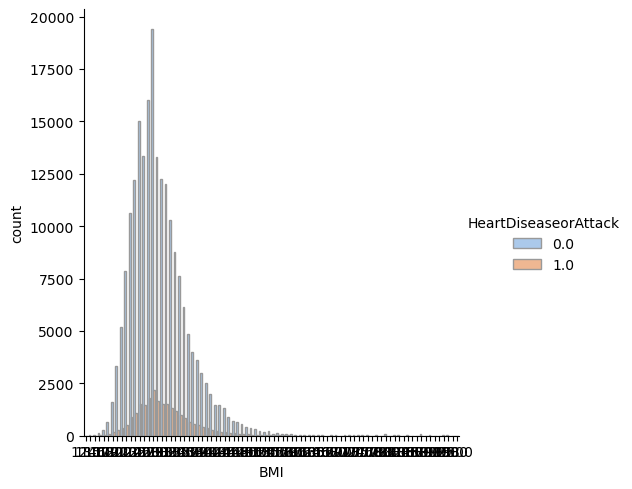

In [24]:
show_ratio(train_df, 'BMI')

         count      sum  ratio  ratio2
Smoker                                
0.0     122781   9006.0    7.3    53.4
1.0     107000  14711.0   13.7    46.6


<Figure size 200x200 with 0 Axes>

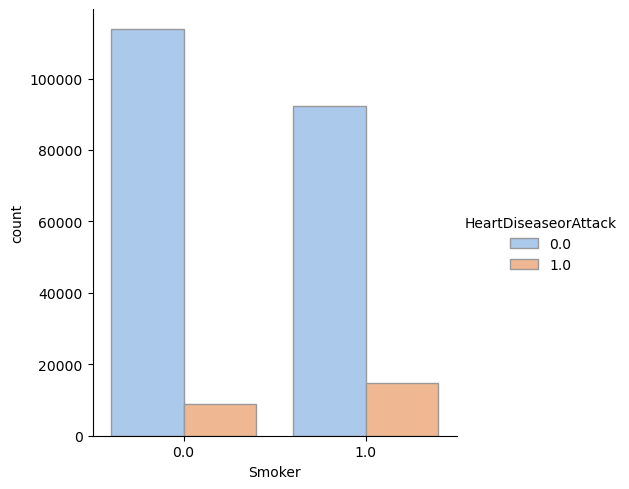

In [25]:
show_ratio(train_df, 'Smoker')

               count      sum  ratio  ratio2
PhysActivity                                
0.0            61270   8589.0   14.0    26.7
1.0           168511  15128.0    9.0    73.3


<Figure size 200x200 with 0 Axes>

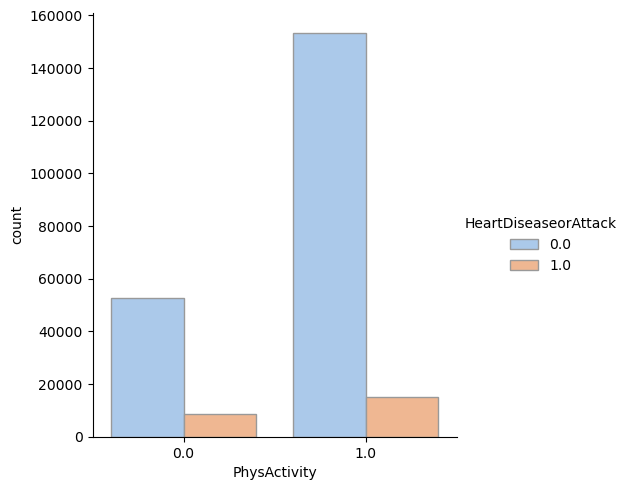

In [26]:
show_ratio(train_df, 'PhysActivity')

In [27]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='HeartDiseaseorAttack')
y = train_df.loc[:, ['HeartDiseaseorAttack']]

print('X shape : ', X.shape)
print('y shape : ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

X shape :  (229781, 21)
y shape :  (229781, 1)


((183824, 21), (45957, 21))

In [28]:
normal = pd.concat([X_train, y_train], axis=1)
normal['HeartDiseaseorAttack'].value_counts()

0.0    164850
1.0     18974
Name: HeartDiseaseorAttack, dtype: int64

In [29]:
# 정상 데이터만으로 학습??
normal = normal[normal['HeartDiseaseorAttack']==0.0]
X_train = normal.drop(columns='HeartDiseaseorAttack')
y_train = normal.loc[:, ['HeartDiseaseorAttack']]

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [31]:
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.optim import lr_scheduler
from tqdm.auto import tqdm

In [32]:
class Heart(Dataset):
    def __init__(self, X, y):
        self.n_samples = X.shape[0]
        X = X.to_numpy()
        y = y.to_numpy()
        self.x_data = torch.from_numpy(X.astype(np.float32))
        self.y_data = torch.from_numpy(y.astype(np.float32))

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.n_samples

In [33]:
train_data = Heart(X_train, y_train)
test_data = Heart(X_test, y_test)

In [34]:
x_sample, y_sample = train_data[0]
print(f'elements of x_sample : \n{x_sample[:10]} \nand y_sampe : {y_sample}')

elements of x_sample : 
tensor([1.0000, 0.0000, 1.0000, 0.1744, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 
and y_sampe : tensor([0.])


In [35]:
BS = 128

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BS, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=1, shuffle=False)

print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 164850 and length of train loader is : 1288
length of test data is : 45957 and length of test loader is : 45957


In [36]:
import torch.nn as nn

# 21 -> 5 -> 21
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 5),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(5, input_size),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoeed = self.decoder(encoded)
        return encoded, decoeed

In [37]:
INPUT_SIZE = X.shape[1]
NUM_EPOCH = 5
LR = 0.01
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loss = []
criterion = nn.MSELoss(reduction='sum')
model = Autoencoder(INPUT_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = lr_scheduler.StepLR(optimizer, 10, gamma=0.2)
total_step = len(train_loader)

def train_ae(model1, train_loader, epoch):
    train_epoch_loss = 0
    model1.train()

    loop = tqdm(enumerate(train_loader), total=total_step)

    for i, batch in loop:
        optimizer.zero_grad()
        x, y = batch
        x = x.to(device)
        _, x_pred = model1(x)
        loss_train = criterion(x_pred, x)
        loss_train.backward()
        optimizer.step()
        train_epoch_loss += loss_train.item()
        loop.set_description(f'Epoch : [{epoch}/{NUM_EPOCH}]')
        loop.set_postfix(loss=loss_train.item())
    train_loss.append(train_epoch_loss/len(train_loader))
    return train_loss

In [38]:
for epoch in range(NUM_EPOCH):
    train_loss = train_ae(model, train_loader, epoch)
    scheduler.step()

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

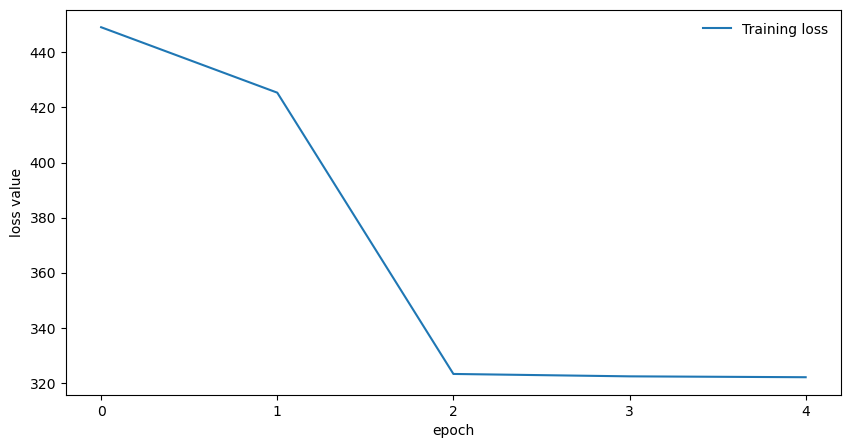

In [39]:
def plot_loss(loss):
    plt.figure(figsize=(10,5))
    plt.plot(loss, label='Training loss')
    plt.legend(frameon=False)
    plt.xticks([i for i in range(0, NUM_EPOCH)])
    plt.xlabel('epoch')
    plt.ylabel('loss value')
    plt.show()
plot_loss(train_loss)

In [42]:
test_loss = []
test_loss_ins = []
model.eval()
with torch.no_grad():
    test_epoch_loss = 0
    for batch in test_loader:
        x, y = batch
        _, x_pred_test = model(x)
        loss_test = criterion(x_pred_test, x)
        test_loss_ins.append(loss_test.item())

In [43]:
test_set = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(test_loss_ins,columns=['mse'])], axis=1)
test_set

,HeartDiseaseorAttack,mse
0,0.0,1.373860
1,0.0,2.648045
2,0.0,2.975178
3,0.0,2.418998
4,0.0,2.439060
...,...,...
45952,1.0,5.266573
45953,0.0,2.508134
45954,0.0,0.921736
45955,0.0,2.758132


,HeartDiseaseorAttack,mse
0,0.0,1.373860
1,0.0,2.648045
2,0.0,2.975178
3,0.0,2.418998
4,0.0,2.439060
...,...,...
45952,1.0,5.266573
45953,0.0,2.508134
45954,0.0,0.921736
45955,0.0,2.758132
